In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Import the data**

In [ ]:
# Import pandas and read the CSV in the Google Drive

import pandas as pd

df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **Cleaning the data**

In [ ]:
# Check for missing values
df.isnull().sum()


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [ ]:
# Drop rows with missing values
df = df.dropna()


# **Exploratory Data Analysis**

In [ ]:
# Check the shape of the dataset
print("Dataset Shape:", df.shape)


Dataset Shape: (16291, 11)


The shape tells us how many rows and columns there are. There are 16291 rows and 11 columns.

In [ ]:
# Get summary statistics of different region sales and global sales
selected_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
print(df[selected_columns].describe())


           NA_Sales      EU_Sales      JP_Sales   Other_Sales  Global_Sales
count  16291.000000  16291.000000  16291.000000  16291.000000  16291.000000
mean       0.265647      0.147731      0.078833      0.048426      0.540910
std        0.822432      0.509303      0.311879      0.190083      1.567345
min        0.000000      0.000000      0.000000      0.000000      0.010000
25%        0.000000      0.000000      0.000000      0.000000      0.060000
50%        0.080000      0.020000      0.000000      0.010000      0.170000
75%        0.240000      0.110000      0.040000      0.040000      0.480000
max       41.490000     29.020000     10.220000     10.570000     82.740000


Here I pulled the summary statistics for each region. Keep in mind for the mean the number is in millions since the dataset is in millions. From this data we can see that NA_sales have a higher mean than the other regions. The high std indicates a greater variability in sales.

In [ ]:
# Import libraries beneficial to my analysis
import matplotlib.pyplot as plt
import seaborn as sns

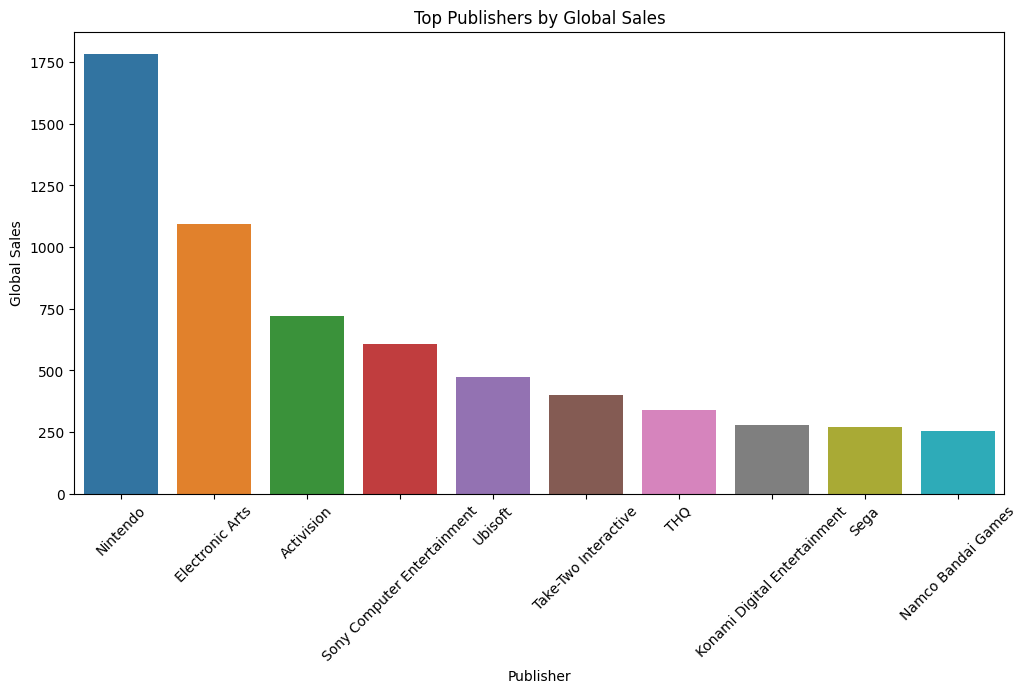

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Group the data by 'Publisher' and calculate the sum of 'Global_Sales' for each publisher
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Create a bar plot to visualize the top publishers by global sales
sns.barplot(x=publisher_sales.index, y=publisher_sales.values)

# Set the title, x-label, and y-label for the plot
plt.title('Top Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



Here we can see the top publishers in the video game industry based on global sales. We can identify the key players and their market share, which is essential for benchmarking and understanding the competitive landscape.

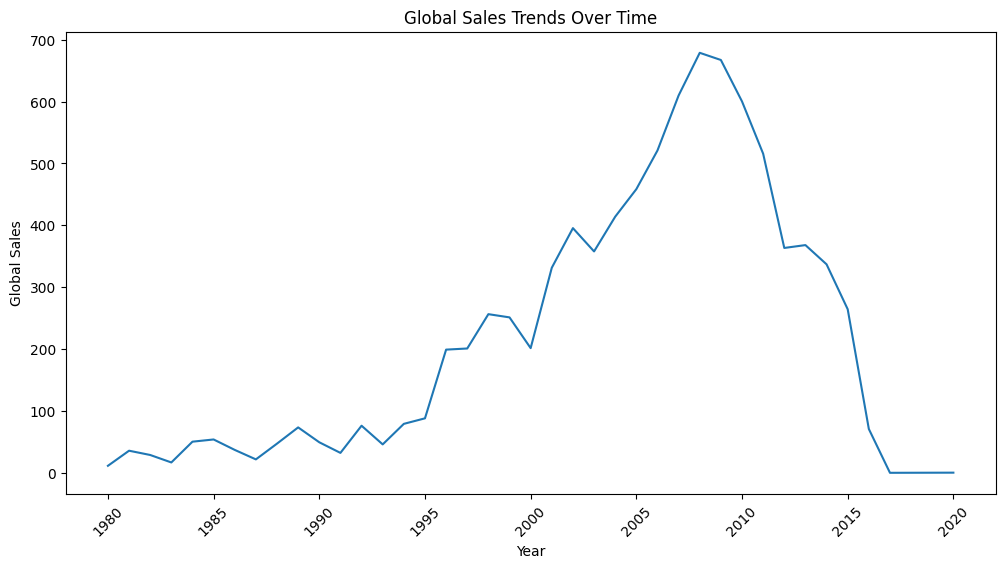

In [ ]:
# Line graph of sales trends over time
# Configure the size
plt.figure(figsize=(12, 6))

# Group the data by year and calculate the sum of global sales
yearly_sales = df.groupby('Year')['Global_Sales'].sum()

# Create a line chart for visualization
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)

# Provide labels
plt.title('Global Sales Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



Analyzing global sales over time allows us to assess the overall performance of the video game industry. We can observe trends such as growth rates, market fluctuations, and periods of expansion or contraction.


lets look at it closer by region

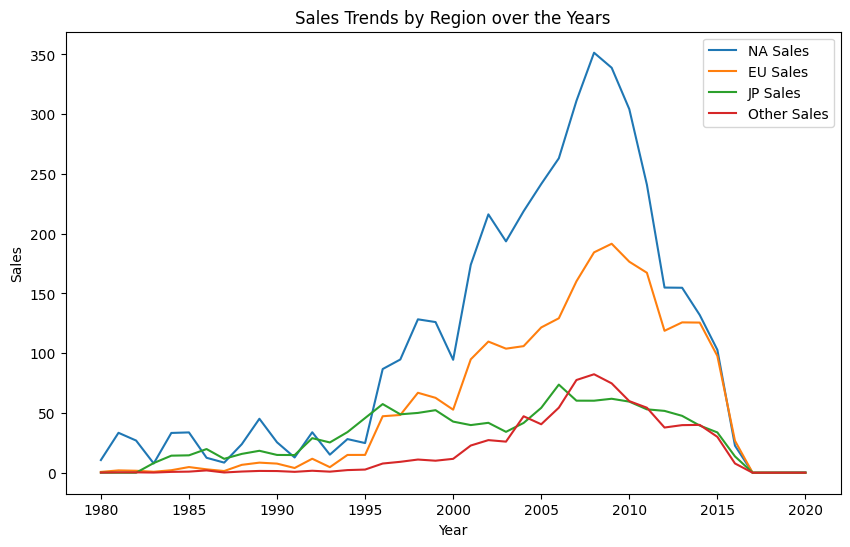

In [ ]:
# Line graph of sales trends by region over the years
# Configure the size
plt.figure(figsize=(10, 6))

# Grouping the data by year and summing the sales for each region
sales_by_year = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting the line chart for each region
plt.plot(sales_by_year.index, sales_by_year['NA_Sales'], label='NA Sales')
plt.plot(sales_by_year.index, sales_by_year['EU_Sales'], label='EU Sales')
plt.plot(sales_by_year.index, sales_by_year['JP_Sales'], label='JP Sales')
plt.plot(sales_by_year.index, sales_by_year['Other_Sales'], label='Other Sales')

# Adding labels and title
plt.title('Sales Trends by Region over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()

plt.show()


This line chart helps to identify patterns, growth or decline trends, and the relative performance of different regions in terms of sales. It shows visual representation of how sales have evolved for each region. There's a slight spike in the gaming industry from 2005-2010 across all regions indicating a height in popularity during that time. This can be due to an introduction of a new gaming console or other factors like releases of highly anticipated games.

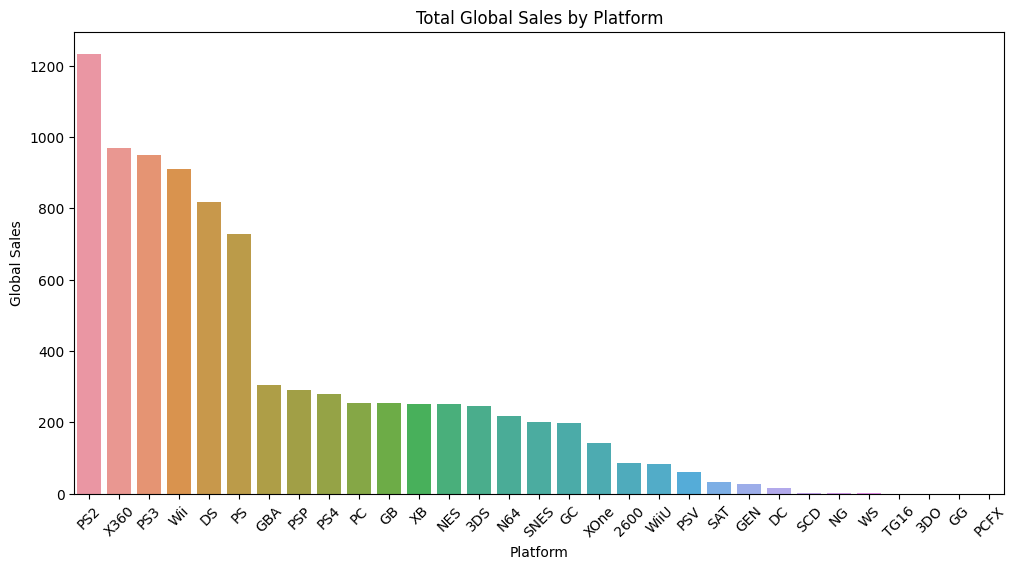

In [ ]:
# Bar graph of Sales by Platform
plt.figure(figsize=(12, 6))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

 This bar chart provides a clear comparison of sales performance across different platforms, identifying the top-selling platforms and assess their relative contributions to the overall sales. You can see here that the PS2 significantly out performed all other platforms. This information can be valuable for understanding market trends, identifying popular platforms for game releases, and making informed decisions related to platform selection for future game development and marketing strategies.

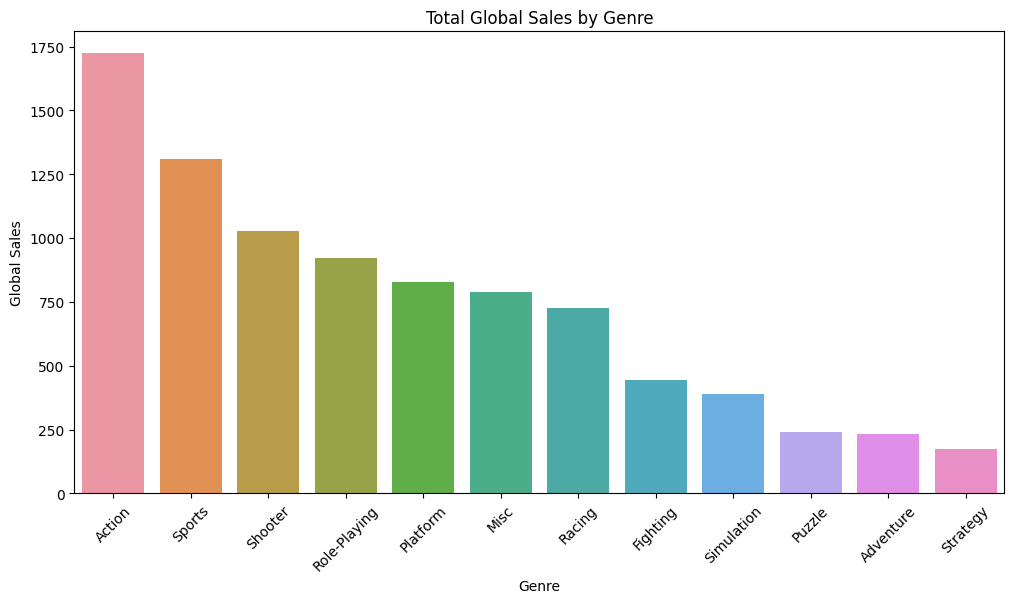

In [ ]:
# Bar graph of Sales by Genre
plt.figure(figsize=(12, 6))
platform_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title('Total Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()

By creating this bar chart, you can gain insights into the popularity and performance of different genres in the market. Looking at the chart we can see that action-type games are highly favorable following sports and then shooter games. This information is valuable for understanding consumer preferences, identifying lucrative genres, and making data-informed decisions related to game development, marketing strategies, and investment in specific genres. By analyzing the sales distribution across genres, you can identify which genres have the highest sales potential and tailor your strategies accordingly to maximize sales and market share.

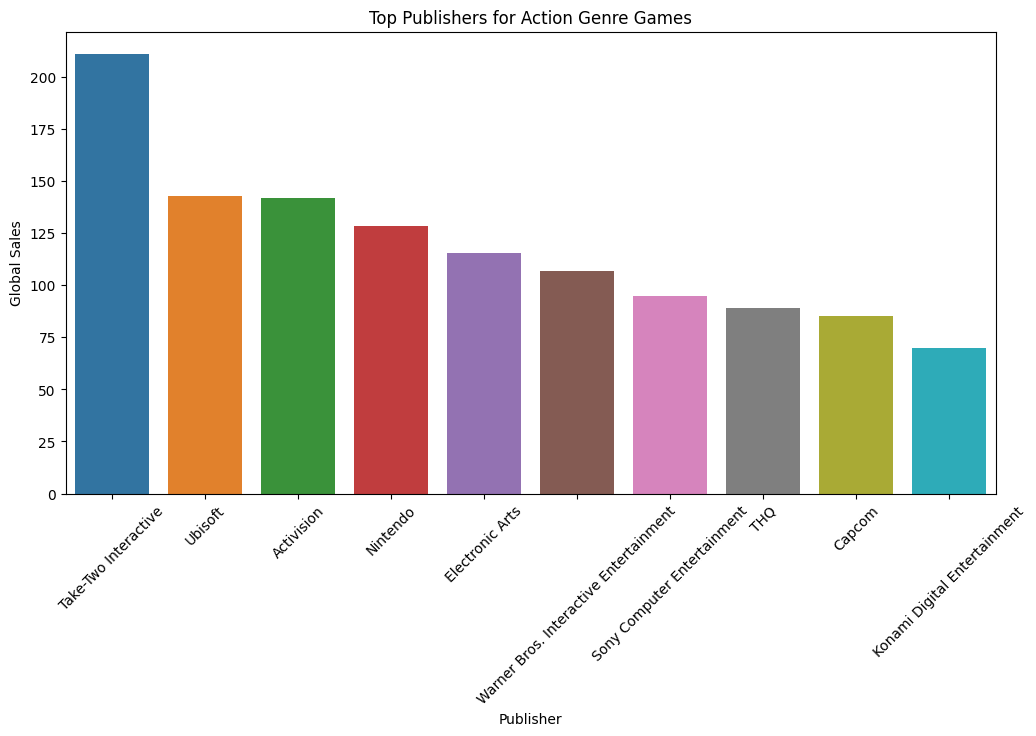

In [ ]:
# Bar chart of top publishers for action genre games
# Filter the dataset for action genre games
action_games = df[df['Genre'] == 'Action']

# Calculate the total global sales by publisher
publisher_sales = action_games.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Select the top publishers
top_publishers = publisher_sales.head(10)

# Create a bar plot to visualize the top publishers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values)
plt.title('Top Publishers for Action Genre Games')
plt.xlabel('Publisher')
plt.ylabel('Global Sales')
plt.xticks(rotation=45)
plt.show()


This graph narrows down our analysis to action genre games, which are known to be popular among gamers. By filtering the dataset, we can calculate the total global sales for each publisher using the groupby() function. The resulting sales are then sorted in descending order to determine the top publishers.We can see Take-Two Interactive dominates the action genre games. This information can help you identify the publishers that have been successful in the action genre and make informed decisions related to partnerships, game development, or marketing strategies.

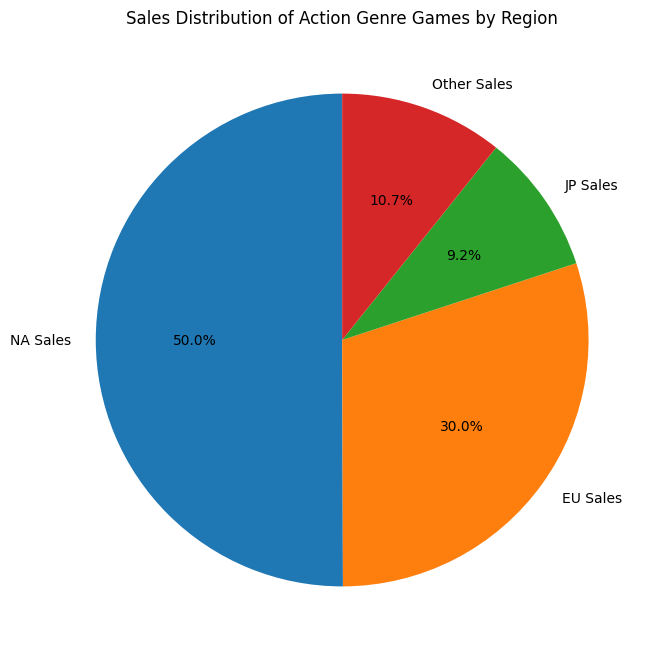

In [ ]:
# Pie chart of distributed sales of action type genre games by region
# Filter the dataset for action genre games
action_games = df[df['Genre'] == 'Action']

# Calculate the total sales per region
na_sales = action_games['NA_Sales'].sum()
eu_sales = action_games['EU_Sales'].sum()
jp_sales = action_games['JP_Sales'].sum()
other_sales = action_games['Other_Sales'].sum()

# Create a list of sales per region
sales_data = [na_sales, eu_sales, jp_sales, other_sales]

# Create labels for the pie chart
labels = ['NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_data, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution of Action Genre Games by Region')
plt.show()


The pie chart illustrates the sales distribution of action genre games across the different regions: North America (NA Sales), Europe (EU Sales), Japan (JP Sales), and other regions (Other Sales). The chart provides a visual representation of the proportion of sales for each region, allowing for a quick and intuitive understanding of the regional sales distribution for action genre games. Most action-genre game sales occur in North America, followed by Europe and other locations. Understanding the sales distribution of action genre games across regions allows a company to make data-driven decisions, target its marketing efforts, optimize resource allocation, and tailor its strategies to maximize sales and profitability in specific regions.

# **Now let's test our hypothesis'.**

In [ ]:
# Select the platforms for comparison
platforms = ['PS2', 'X360', 'PS3']

# Filter the data for the selected platforms
data_ps2 = df[df['Platform'] == 'PS2']['Global_Sales']
data_x360 = df[df['Platform'] == 'X360']['Global_Sales']
data_ps3 = df[df['Platform'] == 'PS3']['Global_Sales']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(data_ps2, data_x360, equal_var=False)
alpha = 0.05

# Print the t-test results
print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < alpha:
    print("\nConclusion:")
    print("Based on the results of the t-test, we reject the null hypothesis.")
    print("There is a significant difference in global game sales between the PS2 and X360 platforms.")
else:
    print("\nConclusion:")
    print("Based on the results of the t-test, we fail to reject the null hypothesis.")
    print("There is no significant difference in global game sales between the PS2 and X360 platforms.")


T-Test Results:
T-Statistic: -3.905196884854403
P-Value: 9.737919759667725e-05

Conclusion:
Based on the results of the t-test, we reject the null hypothesis.
There is a significant difference in global game sales between the PS2 and X360 platforms.


**Hypothesis 1:** The platform has a significant impact on global game sales.<br>
Null Hypothesis: There is no significant difference in global game sales across different platforms.<br>
Alternative Hypothesis: Certain platforms have a higher impact on global game sales compared to others.<br>
Test: two tailed T-test assuming unequal variances

In [ ]:
# Select the data for action and shooter games
action_sales = df[df['Genre'] == 'Action']['Global_Sales']
shooter_sales = df[df['Genre'] == 'Shooter']['Global_Sales']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(action_sales, shooter_sales, equal_var=False)

# Print the t-test results
print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare the p-value to the significance level (e.g., 0.05) to draw conclusions
if p_value < 0.05:
    print("Conclusion: Based on the results of the t-test, we reject the null hypothesis.")
    print("There is a significant difference in global game sales between action and shooter genres.")
else:
    print("Conclusion: The results of the t-test do not provide sufficient evidence to reject the null hypothesis.")
    print("There is no significant difference in global game sales between action and shooter genres.")


T-Test Results:
T-Statistic: -4.906414873301087
P-Value: 1.0160404177639581e-06
Conclusion: Based on the results of the t-test, we reject the null hypothesis.
There is a significant difference in global game sales between action and shooter genres.


**Hypothesis 2:** Game genre influences global sales performance.<br>
Null Hypothesis: There is no significant difference in global game sales across different genres.<br>
Alternative Hypothesis: Certain genres have a higher impact on global game sales compared to others.<br>
Test: two tailed T-test assuming unequal variances

In [ ]:
# Select the data for the desired regional sales and platforms
na_sales = df['NA_Sales']
eu_sales = df['EU_Sales']
jp_sales = df['JP_Sales']
other_sales = df['Other_Sales']
platforms = df['Platform']

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(na_sales[platforms == 'PS2'],
                                      na_sales[platforms == 'X360'],
                                      na_sales[platforms == 'PS3'],
                                      eu_sales[platforms == 'PS2'],
                                      eu_sales[platforms == 'X360'],
                                      eu_sales[platforms == 'PS3'],
                                      jp_sales[platforms == 'PS2'],
                                      jp_sales[platforms == 'X360'],
                                      jp_sales[platforms == 'PS3'],
                                      other_sales[platforms == 'PS2'],
                                      other_sales[platforms == 'X360'],
                                      other_sales[platforms == 'PS3'])

# Print the ANOVA test results
print("ANOVA Results:")
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Compare the p-value to the significance level (e.g., 0.05) to draw conclusions
if p_value < 0.05:
    print("Conclusion: Based on the results of the ANOVA test, we reject the null hypothesis.")
    print("There is a significant difference in regional game sales across different platforms.")
else:
    print("Conclusion: The results of the ANOVA test do not provide sufficient evidence to reject the null hypothesis.")
    print("There is no significant difference in regional game sales across different platforms.")


ANOVA Results:
F-Statistic: 118.56974687348277
P-Value: 1.1602471172240811e-263
Conclusion: Based on the results of the ANOVA test, we reject the null hypothesis.
There is a significant difference in regional game sales across different platforms.


**Hypothesis 3:** Regional sales vary based on game platform. <br>
Null Hypothesis: There is no significant difference in regional game sales across different platforms.<br>
Alternative Hypothesis: Certain platforms perform better in specific regions, leading to variations in regional sales.<br>
Test: ANOVA single factor



In [ ]:
# Select the data for the desired publishers
nintendo_sales = df[df['Publisher'] == 'Nintendo']['Global_Sales']
ea_sales = df[df['Publisher'] == 'Electronic Arts']['Global_Sales']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(nintendo_sales, ea_sales, equal_var=False)

# Print the t-test results
print("T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare the p-value to the significance level (e.g., 0.05) to draw conclusions
if p_value < 0.05:
    print("Conclusion: Based on the results of the t-test, we reject the null hypothesis.")
    print("There is a significant difference in global game sales between Nintendo and Electronic Arts.")
else:
    print("Conclusion: The results of the t-test do not provide sufficient evidence to reject the null hypothesis.")
    print("There is no significant difference in global game sales between Nintendo and Electronic Arts.")


T-Test Results:
T-Statistic: 8.047587188950015
P-Value: 3.482759248034891e-15
Conclusion: Based on the results of the t-test, we reject the null hypothesis.
There is a significant difference in global game sales between Nintendo and Electronic Arts.


**Hypothesis 4:** The publisher affects global sales performance. <br>
Null Hypothesis: There is no significant difference in global game sales across different publishers.<br>
Alternative Hypothesis: Certain publishers have a higher impact on global game sales compared to others.<br>
Test: two tailed T-test assuming unequal variances


# **Recommendations**

**Conclusion** <br>


1.  <u> Platform Impact on Global Game Sales:</u>


*   Gaming companies should consider the platform selection carefully, as it can
have a significant impact on the sales performance of their games.
*   Strategies focused on PS2 or X360 platforms may yield different results, and decisions should be based on the target market, game genre, and other relevant factors.


2.  <u> Genre Influence on Global Sales Performance:</u>


*   Game developers and publishers should pay attention to genre selection, as it can play a crucial role in the success of their games.
*   Understanding consumer preferences and market trends related to specific genres can help inform game development and marketing strategies.


3. <u> Regional Sales Variation Based on Game Platform:</u>


*   Gaming companies should consider regional preferences and tailor their strategies accordingly.
*   Localization efforts, regional marketing campaigns, and platform-specific optimizations may be beneficial in maximizing regional sales performance.

4. <u> Publisher Impact on Global Sales Performance:</u>


*   Publishers play a crucial role in the success of games, and their reputation, marketing efforts, and target audience can significantly impact sales performance.
*   Gaming companies should carefully consider publisher partnerships and collaborations to leverage the strengths and market reach of reputable publishers.
<br><br>

By understanding the factors that contribute to successful game launches and consumer preferences, gaming companies can make informed decisions to maximize game sales, increase market share, and optimize ROI.
